In [1]:
# Дальнейшие цели:
# 1) Вести в список приложений в одной сводной таблице. Т.е не делать новую каждый месяц, а добавлять данные в одну. И включать 
# туда как новые приложения, так и уже сущетсвующие 
# 2) Соединить айос и андройд
#

In [1]:
# Установим вспомогательные пакеты
!pip install plotly-express
!pip install nbformat==4.2.0

# Базовый блок 
## Нужен для всего в дальнейшем

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.ticker as ticker

# Модули для визуализации
%matplotlib inline
import matplotlib.pyplot as plt

# %matplotlib notebook
import seaborn as sns
import plotly
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

%config InlineBackend.figure_format = 'svg' # Графики в svg выглядят четче

# Увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

import warnings
warnings.filterwarnings('ignore')

In [27]:
#https://stackoverflow.com/questions/55715774/time-data-doesnt-match-format-specified
# либо заменить на тире, либо как-то по-другому. ему мешает вот это "~"
df["Period"].replace(to_replace='~',value='-')
df['Period'] = pd.to_datetime(df['Period'], format = '%Y-%m-%d~%Y-%m-%d')
df['Period'] = pd.to_datetime(df['Period'], format = '%Y-%m-%d')

error: redefinition of group name 'Y' as group 4; was group 1 at position 89

In [3]:
file_name = "C:\\Users\\svzab\\OneDrive\\Desktop\\App_Annie\\Aug_Util_iOS.xlsx"
df = pd.read_excel(file_name, header = 5)
file_name = file_name.replace('C:\\Users\\svzab\\OneDrive\\Desktop\\App_Annie\\' , '' )
month = file_name.replace('_Util_iOS.xlsx' , '' )

# оставляем только топ по выручке
df_app = df[df['Unit'] == 'USD'].copy()
df_app = df_app.reset_index(drop=True)
df_app.rename(columns = {'Value':'Revenue','Change (Value)':'Change (Revenue)','Store':'Platform'}, inplace = True)

#исправляем тип даты
df_app["Change (%)"] = df_app["Change (%)"].str.strip("%")
df_app["Change (%)"] = df_app["Change (%)"].astype("float64")
df_app["Change (%)"]

#удаляем ненужные столбцы
del df_app['Parent Company ID']
del df_app['Type']
del df_app['Company ID']
del df_app['Version']
del df_app['Country']
del df_app['Device']
del df_app['Publisher ID']
del df_app['Company Name']
del df_app['App Franchise']
del df_app['Value Type']
del df_app['App IAP']
del df_app['App Franchise ID']
del df_app['Publisher Name']
del df_app['App Category']
del df_app['Is Unified']

# добавляем запятые для удобной визуализации
pd.options.display.float_format = '{:,}'.format

print(df_app.isnull().sum())
df_app["Change (%)"].fillna(df_app["Change (%)"].median())

df_app

Rank                     0
Category                 0
Platform                 0
Period                   0
App ID                   0
App Name                 0
Revenue                  0
Change (%)              34
Change (Rank)          120
Change (Revenue)         0
Unit                     0
AppURL                   0
Star Rating              0
Ratings                  0
App Release Date         0
Last Update              0
Parent Company Name      9
HQ Country             722
dtype: int64


,Rank,Category,Platform,Period,App ID,App Name,Revenue,Change (%),Change (Rank),Change (Revenue),Unit,AppURL,Star Rating,Ratings,App Release Date,Last Update,Parent Company Name,HQ Country
0,1,Utilities,iOS,2020-08-01~2020-08-31,"1,000,600,000,625,592.0",RoboKiller,"793,871.0",0.64,0.0,"5,047.0",USD,http://www.appannie.com/apps/all-stores/app/10...,4.6,282605,2015-09-08,2020-08-24,TelTech,United States
1,2,Utilities,iOS,2020-08-01~2020-08-31,"1,518,341,823.0",Суbеr Shiеld - Wеb Dеfеndеr,"487,998.0",301.51,25.0,"366,456.0",USD,http://www.appannie.com/apps/ios/app/1518341823/,3.9,863,2020-07-09,2020-09-01,Scuba trade OU,NaN
2,3,Utilities,iOS,2020-08-01~2020-08-31,"1,000,600,000,548,431.0",VPN by NordVPN,"399,231.0",-7.05,0.0,"-30,285.0",USD,http://www.appannie.com/apps/all-stores/app/10...,4.6,100931,2014-12-09,2020-08-10,Tefinkom & CO,Panama
3,4,Utilities,iOS,2020-08-01~2020-08-31,"1,000,600,000,441,407.0",Burner,"353,578.0",-3.39,2.0,"-12,419.0",USD,http://www.appannie.com/apps/all-stores/app/10...,4.5,12985,2012-04-01,2020-08-12,Ad Hoc Labs,Mexico
4,5,Utilities,iOS,2020-08-01~2020-08-31,"1,000,600,000,575,004.0",QR Reader,"335,652.0",-9.0,0.0,"-33,201.0",USD,http://www.appannie.com/apps/all-stores/app/10...,4.7,320817,2017-02-08,2020-08-10,TinyLab,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Utilities,iOS,2020-08-01~2020-08-31,"541,831,736.0",Recent Contacts,287.0,119.08,nan,156.0,USD,http://www.appannie.com/apps/ios/app/541831736/,4.8,510,2012-07-17,2020-09-01,Kyle Gorlick,NaN
996,997,Utilities,iOS,2020-08-01~2020-08-31,"1,481,937,978.0",SamRT - Smart Things App,286.0,-9.49,-36.0,-30.0,USD,http://www.appannie.com/apps/ios/app/1481937978/,3.5,481,2019-11-20,2020-09-01,TV Cast,NaN
997,998,Utilities,iOS,2020-08-01~2020-08-31,"1,434,761,272.0",QR Code Reader ٞ,286.0,-19.89,-76.0,-71.0,USD,http://www.appannie.com/apps/ios/app/1434761272/,4.5,71,2018-11-09,2020-09-01,Veron Mobile,NaN
998,999,Utilities,iOS,2020-08-01~2020-08-31,"905,734,645.0","Armor Inspector: WoT PC,Blitz",285.0,145.69,nan,169.0,USD,http://www.appannie.com/apps/ios/app/905734645/,3.7,900,2014-08-30,2020-09-01,Andrew Karpushin,NaN


# Первый этап очищения ( корпорации включены)


In [4]:
df_pivot = df_app.copy()

del df_pivot['App ID']
del df_pivot['Period']
del df_pivot['Unit']
del df_pivot['AppURL']
del df_pivot['Star Rating']
del df_pivot['Ratings']
del df_pivot['App Release Date']
del df_pivot['Last Update']
del df_pivot['HQ Country']
del df_pivot['Rank']
del df_pivot['Change (Rank)']
df_pivot = df_pivot[["App Name","Category","Parent Company Name", "Revenue", "Change (%)", "Change (Revenue)"]]
df_pivot.rename(columns = {'Parent Company Name':'Parent'}, inplace = True)

df_pivot = df_pivot.dropna(subset=['Change (%)'])

# не получается удалить трешовые приложения !!!!!
#trash = ["Wallpaper","wallpaper","Wallpapers","wallpapers","Wallpaper"]
#indices = df_pivot[df_pivot["App Name"].isin(trash)].index
#df_pivot.drop(indices, inplace = True)

category = df_pivot["Category"][1]

df_pivot = df_pivot.reset_index(drop=True)
print(df_pivot.shape)
df_pivot["Change (%)"].fillna(df_pivot["Change (%)"].median())
df_pivot

(966, 6)


,App Name,Category,Parent,Revenue,Change (%),Change (Revenue)
0,RoboKiller,Utilities,TelTech,"793,871.0",0.64,"5,047.0"
1,Суbеr Shiеld - Wеb Dеfеndеr,Utilities,Scuba trade OU,"487,998.0",301.51,"366,456.0"
2,VPN by NordVPN,Utilities,Tefinkom & CO,"399,231.0",-7.05,"-30,285.0"
3,Burner,Utilities,Ad Hoc Labs,"353,578.0",-3.39,"-12,419.0"
4,QR Reader,Utilities,TinyLab,"335,652.0",-9.0,"-33,201.0"
...,...,...,...,...,...,...
961,Recent Contacts,Utilities,Kyle Gorlick,287.0,119.08,156.0
962,SamRT - Smart Things App,Utilities,TV Cast,286.0,-9.49,-30.0
963,QR Code Reader ٞ,Utilities,Veron Mobile,286.0,-19.89,-71.0
964,"Armor Inspector: WoT PC,Blitz",Utilities,Andrew Karpushin,285.0,145.69,169.0


# Part 1
## делаем 2 датафрейма ( для оборота в месяц и для роста в месяц)

In [10]:
# сначала создаем пустые
df_rev = pd.DataFrame({'Category':[], 'Jul': []})
df_growth = pd.DataFrame({'Category':[], 'Jul': []})
df_growth

,Category,Jul


## Revenue

### первый раз включаем категорию в датафрейм

In [46]:
df_helper_rev = pd.DataFrame({'Category':[df_pivot.Category[1]], 'Jul': [df_pivot["Revenue"].sum()]})
df_rev = df_rev.append(df_helper_rev,ignore_index = True)
df_rev

,Apr,Category,Feb,Jul,Jun,Mar,May
0,"6,994,282.0",Books,"4,846,786.0","9,816,153.0","8,712,324.0","5,844,964.0","8,173,745.0"
1,"12,090,450.0",Business,"10,380,734.0","14,400,492.0","13,419,888.0","11,661,084.0","12,720,937.0"
2,"31,102,429.0",Education,"21,500,869.0","31,816,116.0","30,385,512.0","25,882,147.0","31,881,489.0"
3,"77,926,073.0",Entertainment,"68,955,466.0","89,251,811.0","78,205,463.0","77,828,331.0","80,016,713.0"
4,"3,064,045.0",Finance,"3,009,065.0","3,570,307.0","3,270,262.0","3,258,957.0","3,308,730.0"
5,"732,728.0",Food and Drink,"788,712.0","777,648.0","740,145.0","638,291.0","763,340.0"
6,"33,527,780.0",Health and Fitness,"28,949,778.0","39,089,149.0","36,511,568.0","30,600,290.0","37,445,424.0"
7,"15,598,136.0",Kids,"9,907,778.0","16,013,065.0","14,731,429.0","13,204,624.0","15,352,072.0"
8,"4,099,302.0",Magazines and Newspapers,"3,596,499.0","4,593,791.0","4,381,558.0","3,814,035.0","4,377,514.0"
9,"1,635,055.0",Medical,"1,523,468.0","1,831,012.0","1,753,750.0","1,623,338.0","1,689,932.0"


### для всех последующих прогонов

In [551]:
# это уже для  другого месяца
category = df_pivot["Category"][1]
df_rev.loc[df_rev.Category == category, month] = df_pivot["Revenue"].sum()
df_rev

,Category,Feb,Mar,Apr,May,Jun,Jul,Aug
0,Books,"4,846,786.0","5,844,964.0","6,994,282.0","8,173,745.0","8,712,324.0","9,816,153.0","10,840,392.0"
1,Business,"10,380,734.0","11,661,084.0","12,090,450.0","12,720,937.0","13,419,888.0","14,400,492.0","14,759,142.0"
2,Education,"21,500,869.0","25,882,147.0","31,102,429.0","31,881,489.0","30,385,512.0","31,816,116.0","34,390,652.0"
3,Entertainment,"68,955,466.0","77,828,331.0","77,926,073.0","80,016,713.0","78,205,463.0","89,251,811.0","82,757,561.0"
4,Finance,"3,009,065.0","3,258,957.0","3,064,045.0","3,308,730.0","3,270,262.0","3,570,307.0","3,600,321.0"
5,Food and Drink,"788,712.0","638,291.0","732,728.0","763,340.0","740,145.0","777,648.0","856,408.0"
6,Health and Fitness,"28,949,778.0","30,600,290.0","33,527,780.0","37,445,424.0","36,511,568.0","39,089,149.0","39,000,257.0"
7,Kids,"9,907,778.0","13,204,624.0","15,598,136.0","15,352,072.0","14,731,429.0","16,013,065.0","18,413,175.0"
8,Magazines and Newspapers,"3,596,499.0","3,814,035.0","4,099,302.0","4,377,514.0","4,381,558.0","4,593,791.0","4,636,813.0"
9,Medical,"1,523,468.0","1,623,338.0","1,635,055.0","1,689,932.0","1,753,750.0","1,831,012.0","1,859,165.0"


## Growth

### первый раз включаем категорию в датафрейм

In [47]:
df_helper_growth = pd.DataFrame({'Category':[df_pivot.Category[1]], 'Jul': [df_pivot["Change (%)"].median()]})
df_growth = df_growth.append(df_helper_growth,ignore_index = True)
df_growth

,Apr,Category,Feb,Jul,Jun,Mar,May
0,11.275,Books,-2.255,11.425,-0.45,15.08,8.77
1,7.585,Business,-3.26,8.15,-5.77,15.44,6.76
2,20.07,Education,-0.6,4.6,-3.385,23.435,1.69
3,17.91,Entertainment,-8.83,6.78,-4.51,14.16,8.8
4,-1.68,Finance,6.045,-6.62,-1.165,-1.405,22.76
5,7.41,Food and Drink,-3.08,-11.92,16.065,0.0,6.06
6,17.355,Health and Fitness,-7.88,2.55,-2.78,10.38,12.12
7,19.35,Kids,-1.59,4.005,-5.56,33.96,-2.78
8,15.43,Magazines and Newspapers,3.115,4.23,2.58,14.245,4.14
9,8.76,Medical,-0.99,3.7,11.28,12.505,11.42


### для всех последующих прогонов

In [552]:
# это уже для  другого месяца
category = df_pivot["Category"][1]
df_growth.loc[df_growth.Category == category, month] = df_pivot["Change (%)"].median()
df_growth

,Category,Feb,Mar,Apr,May,Jun,Jul,Aug
0,Books,-2.255,15.08,11.275,8.77,-0.45,11.425,6.89
1,Business,-3.26,15.44,7.585,6.76,-5.77,8.15,3.54
2,Education,-0.6,23.435,20.07,1.69,-3.385,4.6,1.87
3,Entertainment,-8.83,14.16,17.91,8.8,-4.51,6.78,-0.9450000000000001
4,Finance,6.045,-1.405,-1.68,22.76,-1.165,-6.62,14.97
5,Food and Drink,-3.08,0.0,7.41,6.06,16.065,-11.92,4.84
6,Health and Fitness,-7.88,10.38,17.355,12.12,-2.78,2.55,4.835
7,Kids,-1.59,33.96,19.35,-2.78,-5.56,4.005,3.08
8,Magazines and Newspapers,3.115,14.245,15.43,4.14,2.58,4.23,12.025
9,Medical,-0.99,12.505,8.76,11.42,11.28,3.7,7.7


In [457]:
#Comments
# В апреле в шоппинге был всплеск новых приложений, которые раньше не были на рынке
#
#
#

110.0

### Если вдруг надо дропнуть строку

In [ ]:
#df_rev.drop(new_df.tail(1).index,inplace=True)
#df_growth.drop(new_df.tail(1).index,inplace=True)

## Косметика

In [173]:
df_rev = df_rev[["Category", "Feb","Mar","Apr","May", "Jun", "Jul"]]
df_growth = df_growth[["Category", "Feb","Mar","Apr","May", "Jun", "Jul"]]
pd.options.display.float_format = '{:,}'.format
df_growth = df_growth.round(3)

In [8]:
df_growth

,Category,Feb,Mar,Apr,May,Jun,Jul
0,Books,-2.255,15.08,11.275,8.77,-0.45,11.425
1,Business,-3.26,15.44,7.585,6.76,-5.77,8.15
2,Education,-0.6,23.435,20.07,1.69,-3.385,4.6
3,Entertainment,-8.83,14.16,17.91,8.8,-4.51,6.78
4,Finance,6.045,-1.405,-1.68,22.76,-1.165,-6.62
5,Food and Drink,-3.08,0.0,7.41,6.06,16.065,-11.92
6,Health and Fitness,-7.88,10.38,17.355,12.12,-2.78,2.55
7,Kids,-1.59,33.96,19.35,-2.78,-5.56,4.005
8,Magazines and Newspapers,3.115,14.245,15.43,4.14,2.58,4.23
9,Medical,-0.99,12.505,8.76,11.42,11.28,3.7


## копируем датафреймы

In [10]:
df_rev1 = df_rev
df_rev2 = df_rev1
df_growth1 = df_growth
df_growth2 = df_growth1

# Сохранить датафреймы на компьютер

In [557]:
df_rev.to_excel("DF Revenue1.xlsx")

In [558]:
df_growth.to_excel("DF Growth1.xlsx")

# Считываем сохраненные дф с компьютеры

In [3]:
df_rev = pd.read_excel("C:\\Users\\svzab\\OneDrive\\Desktop\\Pivots and DFs\\DF Revenue.xlsx")
df_growth = pd.read_excel("C:\\Users\\svzab\\OneDrive\\Desktop\\Pivots and DFs\\DF Growth.xlsx")
del df_rev["Unnamed: 0"]
del df_growth["Unnamed: 0"]


df_rev["Aug"] = df_rev["Feb"].astype("float64")
df_rev["Jul"] = df_rev["Jul"].astype("float64")
df_rev["Jun"] = df_rev["Jun"].astype("float64")
df_rev["May"] = df_rev["May"].astype("float64")
df_rev["Apr"] = df_rev["Apr"].astype("float64")
df_rev["Mar"] = df_rev["Mar"].astype("float64")
df_rev["Feb"] = df_rev["Feb"].astype("float64")

del df_growth["Aug"]
del df_rev["Aug"]


# добавляем запятые для удобной визуализации
pd.options.display.float_format = '{:,}'.format

In [66]:
df_rev

,Category,Feb,Mar,Apr,May,Jun,Jul
0,Books,"4,846,786.0","5,844,964.0","6,994,282.0","8,173,745.0","8,712,324.0","9,816,153.0"
1,Business,"10,380,734.0","11,661,084.0","12,090,450.0","12,720,937.0","13,419,888.0","14,400,492.0"
2,Education,"21,500,869.0","25,882,147.0","31,102,429.0","31,881,489.0","30,385,512.0","31,816,116.0"
3,Entertainment,"68,955,466.0","77,828,331.0","77,926,073.0","80,016,713.0","78,205,463.0","89,251,811.0"
4,Finance,"3,009,065.0","3,258,957.0","3,064,045.0","3,308,730.0","3,270,262.0","3,570,307.0"
5,Food and Drink,"788,712.0","638,291.0","732,728.0","763,340.0","740,145.0","777,648.0"
6,Health and Fitness,"28,949,778.0","30,600,290.0","33,527,780.0","37,445,424.0","36,511,568.0","39,089,149.0"
7,Kids,"9,907,778.0","13,204,624.0","15,598,136.0","15,352,072.0","14,731,429.0","16,013,065.0"
8,Magazines and Newspapers,"3,596,499.0","3,814,035.0","4,099,302.0","4,377,514.0","4,381,558.0","4,593,791.0"
9,Medical,"1,523,468.0","1,623,338.0","1,635,055.0","1,689,932.0","1,753,750.0","1,831,012.0"


In [103]:
df_rev2["Change for 6 months (%)"] = (df_rev2["Jul"] / df_rev2["Feb"] - 1) * 100
df_rev2 = df_rev2.round(3)
df_rev2

,Feb,Mar,Apr,May,Jun,Jul,Change for 6 months (%)
Category,,,,,,,
Books,"4,846,786.0","5,844,964.0","6,994,282.0","8,173,745.0","8,712,324.0","9,816,153.0",102.529
Business,"10,380,734.0","11,661,084.0","12,090,450.0","12,720,937.0","13,419,888.0","14,400,492.0",38.723
Education,"21,500,869.0","25,882,147.0","31,102,429.0","31,881,489.0","30,385,512.0","31,816,116.0",47.976
Entertainment,"68,955,466.0","77,828,331.0","77,926,073.0","80,016,713.0","78,205,463.0","89,251,811.0",29.434
Finance,"3,009,065.0","3,258,957.0","3,064,045.0","3,308,730.0","3,270,262.0","3,570,307.0",18.652
Food and Drink,"788,712.0","638,291.0","732,728.0","763,340.0","740,145.0","777,648.0",-1.403
Health and Fitness,"28,949,778.0","30,600,290.0","33,527,780.0","37,445,424.0","36,511,568.0","39,089,149.0",35.024
Kids,"9,907,778.0","13,204,624.0","15,598,136.0","15,352,072.0","14,731,429.0","16,013,065.0",61.621
Magazines and Newspapers,"3,596,499.0","3,814,035.0","4,099,302.0","4,377,514.0","4,381,558.0","4,593,791.0",27.73


In [105]:
df_rev2["Change for 6 months (%)"].sort_values()

Category
Travel                     -33.855
Food and Drink              -1.403
Music                       15.602
Sports                      18.243
Finance                     18.652
Medical                     20.187
News                        25.651
Productivity                27.589
Magazines and Newspapers     27.73
Entertainment               29.434
Health and Fitness          35.024
Business                    38.723
Education                   47.976
Lifestyle                   50.063
Shopping                    50.574
Navigation                   55.57
Utilities                   55.809
Kids                        61.621
Photo and Video             63.288
Weather                     70.686
Books                      102.529
Social Networking          116.096
Reference                  117.221
Name: Change for 6 months (%), dtype: float64

# Visualisation

# График для доли категорий

In [5]:
df_rev2 = df_rev2.reset_index()
df_share = df_rev2[["Category", "Jul"]]
df_share.sort_values('Jul', ascending=False, inplace=True)

fig = px.bar(df_share.iloc[::-1],
             y='Category', 
             x='Jul',
             labels={'Category': 'Category', 'Jul': 'Turnover of the category'},
             title='Share of the category in the mobile app market in July', 
             text='Category', 
             height=800, 
             orientation='h') # горизонтальный
fig.show()

## Overall turnover of mobile apps in July - 540 mln dollars

# Notes
### 1) The are overlaps amongst categories :
### - Education vs Kids
### - Social Networking vs Lifestyle ( intersection - dating apps )
### - News vs Magazines&Newspapers, 
### -Productivity vs Utilities ( intersection - VPN apps ) 
### - Utilities vs Reference vs Productivity ( intersection - translators )
### 2) iOS comission is excluded from the Revenue ?????????????
### 3) Gaming industry is a giant. Graphs are distorted by Gaming that is why we won`t include this industry in the overview

## удаление гейминга

In [7]:
df_rev.set_index('Category', inplace=True)

df_growth.set_index('Category', inplace=True)

KeyError: "None of ['Category'] are in the columns"

In [8]:
df_growth = df_growth.drop("Games")
df_rev = df_rev.drop("Games")

In [9]:
df_rev

,Feb,Mar,Apr,May,Jun,Jul
Category,,,,,,
Books,"4,846,786.0","5,844,964.0","6,994,282.0","8,173,745.0","8,712,324.0","9,816,153.0"
Business,"10,380,734.0","11,661,084.0","12,090,450.0","12,720,937.0","13,419,888.0","14,400,492.0"
Education,"21,500,869.0","25,882,147.0","31,102,429.0","31,881,489.0","30,385,512.0","31,816,116.0"
Entertainment,"68,955,466.0","77,828,331.0","77,926,073.0","80,016,713.0","78,205,463.0","89,251,811.0"
Finance,"3,009,065.0","3,258,957.0","3,064,045.0","3,308,730.0","3,270,262.0","3,570,307.0"
Food and Drink,"788,712.0","638,291.0","732,728.0","763,340.0","740,145.0","777,648.0"
Health and Fitness,"28,949,778.0","30,600,290.0","33,527,780.0","37,445,424.0","36,511,568.0","39,089,149.0"
Kids,"9,907,778.0","13,204,624.0","15,598,136.0","15,352,072.0","14,731,429.0","16,013,065.0"
Magazines and Newspapers,"3,596,499.0","3,814,035.0","4,099,302.0","4,377,514.0","4,381,558.0","4,593,791.0"


## График для оборота 

In [673]:
df_rev2.T.columns.values
# цвета
# раздение на группы

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21], dtype=int64)

In [114]:
df_rev1.set_index('Category', inplace=True)
df_rev1

KeyError: "None of ['Category'] are in the columns"

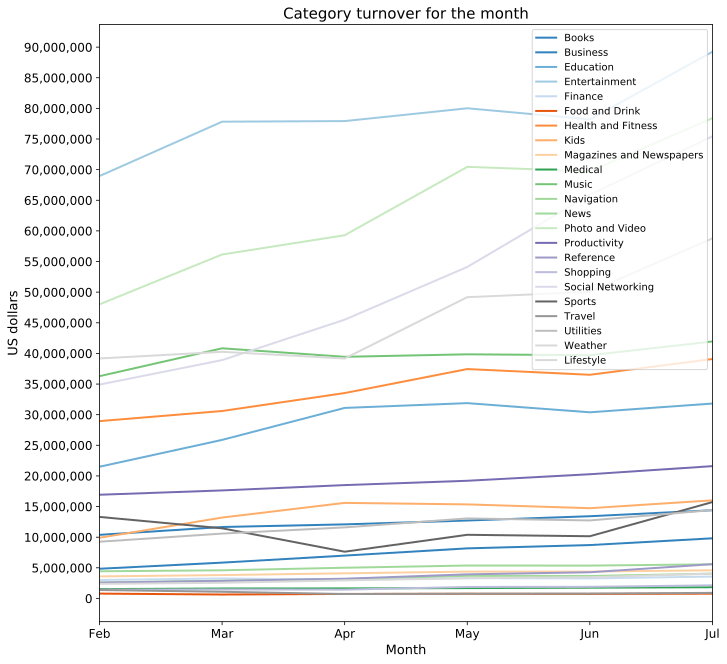

In [11]:
#fig, ax = plt.subplots(figsize=(10, 6))
#plt.plot(new_df.T)

import matplotlib as mpl
import matplotlib.ticker as ticker

ax = df_rev1.T.plot(figsize=(11, 11), lw =2, cmap = 'tab20c')


plt.ticklabel_format(style='plain', axis='y')

# добавляем запятые к числам
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# увеличиваем кол-во делений
plt.locator_params(axis='y', nbins=20)

plt.title("Category turnover for the month",fontsize=15)

plt.ylabel('US dollars',fontsize=13)
plt.xlabel('Month',fontsize=13)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.legend(loc=1, prop={'size': 10})
plt.show()

## Separation of the current dataframe into three new datframes for convenience

## Top Categories

In [12]:
df_sorted_top = df_rev1[df_rev1["Jul"] > 25000000]
df_sorted_top

,Feb,Mar,Apr,May,Jun,Jul
Category,,,,,,
Education,"21,500,869.0","25,882,147.0","31,102,429.0","31,881,489.0","30,385,512.0","31,816,116.0"
Entertainment,"68,955,466.0","77,828,331.0","77,926,073.0","80,016,713.0","78,205,463.0","89,251,811.0"
Health and Fitness,"28,949,778.0","30,600,290.0","33,527,780.0","37,445,424.0","36,511,568.0","39,089,149.0"
Music,"36,286,929.0","40,831,891.0","39,444,530.0","39,851,677.0","39,704,442.0","41,948,517.0"
Photo and Video,"48,016,173.0","56,148,659.0","59,294,038.0","70,456,410.0","69,730,072.0","78,404,594.0"
Social Networking,"34,911,490.0","38,907,071.0","45,507,033.0","54,115,157.0","65,910,148.0","75,442,363.0"
Lifestyle,"39,175,008.0","40,260,445.0","39,168,632.0","49,179,588.0","50,043,645.0","58,787,033.0"


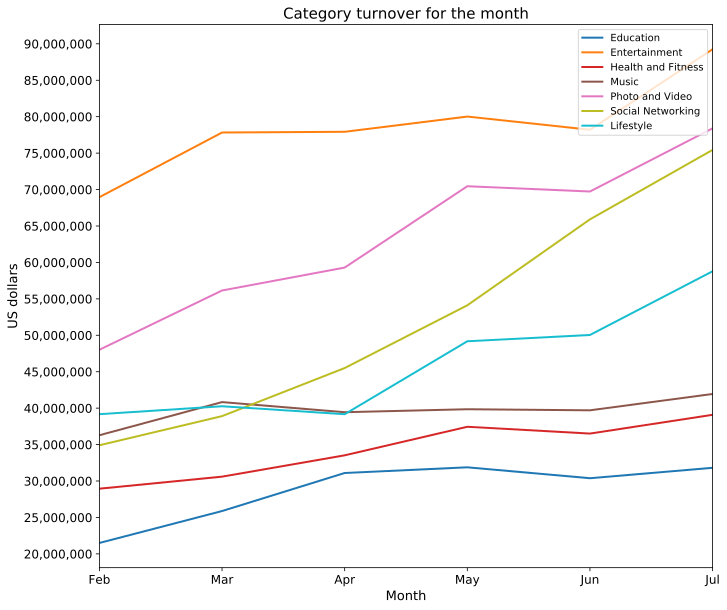

In [13]:
ax = df_sorted_top.T.plot(figsize=(11,10),lw =2, cmap = 'tab10')

plt.ticklabel_format(style='plain', axis='y')

# добавляем запятые к числам
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# увеличиваем кол-во делений
plt.locator_params(axis='y', nbins=20)

plt.title("Category turnover for the month",fontsize=15)

plt.ylabel('US dollars',fontsize=13)
plt.xlabel('Month',fontsize=13)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.legend(loc=1, prop={'size': 10})
plt.savefig('Category Turnover of the Top Categories.jpg')

plt.show();

In [819]:
plt.savefig('Category Turnover of the Top Categories.png')

<Figure size 720x720 with 0 Axes>

# What can we see in raw data

### 1) Photo and Video has increased by 65%
### 2) Social Networking has increased by 140%
### 3) Entertainment has incresed by 30%
### 4) Education has increased by 35%

### >50% of Photo and Video Turnover is provided by YouTube and Twitch

## Middle Categories

In [14]:
df_sorted_middle = df_rev1[(df_rev1["Jul"] > 6000000) & (df_rev1["Jul"] < 25000000)]
df_sorted_middle

,Feb,Mar,Apr,May,Jun,Jul
Category,,,,,,
Books,"4,846,786.0","5,844,964.0","6,994,282.0","8,173,745.0","8,712,324.0","9,816,153.0"
Business,"10,380,734.0","11,661,084.0","12,090,450.0","12,720,937.0","13,419,888.0","14,400,492.0"
Kids,"9,907,778.0","13,204,624.0","15,598,136.0","15,352,072.0","14,731,429.0","16,013,065.0"
Productivity,"16,927,744.0","17,632,362.0","18,502,440.0","19,208,550.0","20,275,979.0","21,597,914.0"
Sports,"13,304,935.0","11,448,197.0","7,628,793.0","10,388,883.0","10,152,992.0","15,732,216.0"
Utilities,"9,261,733.0","10,586,920.0","11,598,584.0","13,060,880.0","12,733,449.0","14,430,620.0"


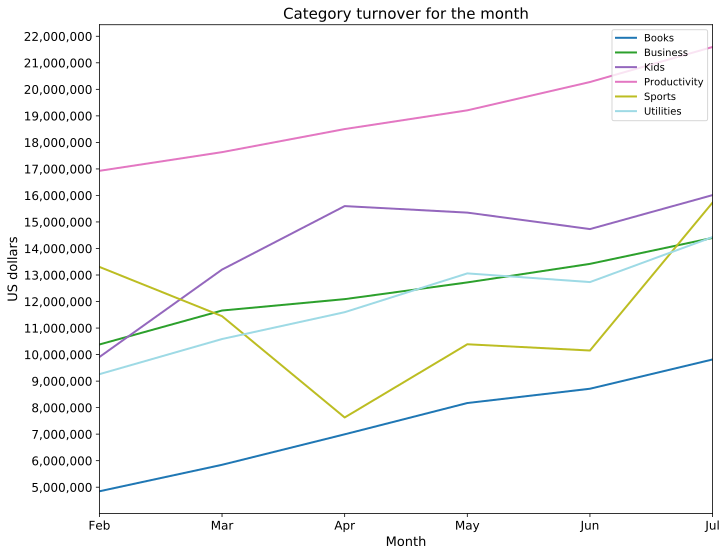

In [15]:
import matplotlib.ticker as ticker

ax = df_sorted_middle.T.plot(figsize=(11, 9), lw =2, cmap = 'tab20')


plt.ticklabel_format(style='plain', axis='y')

# добавляем запятые к числам
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# увеличиваем кол-во делений
plt.locator_params(axis='y', nbins=20)

plt.title("Category turnover for the month",fontsize=15)

plt.ylabel('US dollars',fontsize=13)
plt.xlabel('Month',fontsize=13)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.legend(loc=1, prop={'size': 10})
plt.savefig('Category Turnover of the Middle Categories.jpg')

plt.show()

# What can we see in raw data

### 1) Books  turnover has made 1X from Feb to July 
### 2) Productivity, Books and Books have similar patterns. Gradual and stable growth throughout the whole period with no downturns



## Low Categories

In [16]:
df_sorted_low = df_rev1[df_rev1["Jul"] < 6000000]
df_sorted_low

,Feb,Mar,Apr,May,Jun,Jul
Category,,,,,,
Finance,"3,009,065.0","3,258,957.0","3,064,045.0","3,308,730.0","3,270,262.0","3,570,307.0"
Food and Drink,"788,712.0","638,291.0","732,728.0","763,340.0","740,145.0","777,648.0"
Magazines and Newspapers,"3,596,499.0","3,814,035.0","4,099,302.0","4,377,514.0","4,381,558.0","4,593,791.0"
Medical,"1,523,468.0","1,623,338.0","1,635,055.0","1,689,932.0","1,753,750.0","1,831,012.0"
Navigation,"2,601,914.0","2,893,042.0","3,167,637.0","3,691,643.0","3,669,456.0","4,047,805.0"
News,"4,433,455.0","4,593,346.0","5,011,191.0","5,372,111.0","5,361,767.0","5,570,677.0"
Reference,"2,578,734.0","2,863,184.0","3,220,607.0","3,932,603.0","4,270,669.0","5,601,551.0"
Shopping,"1,422,586.0","1,466,515.0","1,433,682.0","1,878,883.0","1,894,405.0","2,142,049.0"
Travel,"1,375,131.0","1,086,645.0","722,258.0","770,386.0","794,945.0","909,578.0"


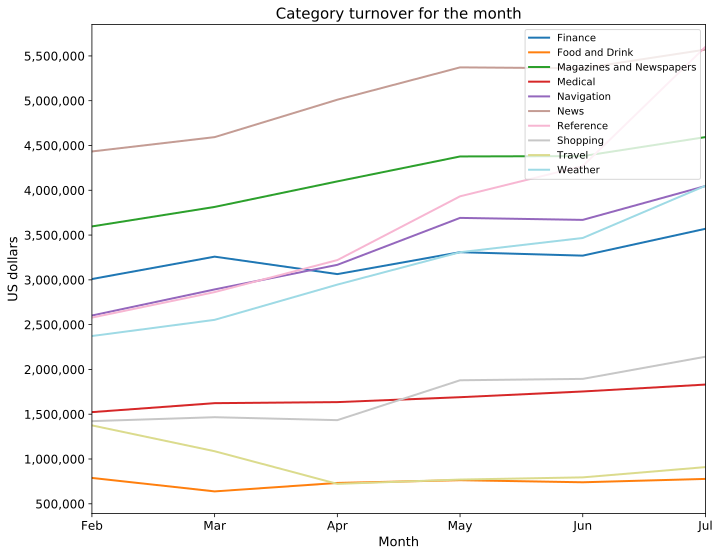

In [17]:
import matplotlib.ticker as ticker

ax = df_sorted_low.T.plot(figsize=(11, 9), lw =2, cmap = 'tab20')


plt.ticklabel_format(style='plain', axis='y')

# добавляем запятые к числам
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# увеличиваем кол-во делений
plt.locator_params(axis='y', nbins=20)

plt.title("Category turnover for the month",fontsize=15)

plt.ylabel('US dollars',fontsize=13)
plt.xlabel('Month',fontsize=13)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.legend(loc=1, prop={'size': 10})
plt.savefig('Category Turnover of the Low Categories.jpg')

plt.show()

# What can we see in raw data

### 1) Reference has grown by 120% since February
### 2) Navigation за полгода вырос на 50%

# Graphs for overlapping categories

## Education and Kids

In [18]:
df_edu_kid = df_rev1.loc[['Education',"Kids"]]
df_edu_kid

,Feb,Mar,Apr,May,Jun,Jul
Category,,,,,,
Education,"21,500,869.0","25,882,147.0","31,102,429.0","31,881,489.0","30,385,512.0","31,816,116.0"
Kids,"9,907,778.0","13,204,624.0","15,598,136.0","15,352,072.0","14,731,429.0","16,013,065.0"


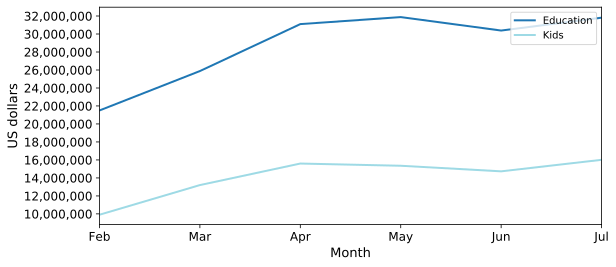

In [20]:
import matplotlib.ticker as ticker

ax = df_edu_kid.T.plot(figsize=(9, 4), lw =2, cmap = 'tab20')


plt.ticklabel_format(style='plain', axis='y')

# добавляем запятые к числам
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# увеличиваем кол-во делений
plt.locator_params(axis='y', nbins=20)

#plt.title("T",fontsize=15)

plt.ylabel('US dollars',fontsize=13)
plt.xlabel('Month',fontsize=13)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.legend(loc=1, prop={'size': 10})
#plt.savefig('Category Turnover of the Low Categories.jpg')

plt.show()

# What can we see in raw data
## Hypothesis:  Education and Kids may have the same growth drivers

## Social Networking and Lifestyle ( intersection - dating apps )

In [21]:
df_socnet_life = df_rev1.loc[['Social Networking',"Lifestyle"]]
df_socnet_life

,Feb,Mar,Apr,May,Jun,Jul
Category,,,,,,
Social Networking,"34,911,490.0","38,907,071.0","45,507,033.0","54,115,157.0","65,910,148.0","75,442,363.0"
Lifestyle,"39,175,008.0","40,260,445.0","39,168,632.0","49,179,588.0","50,043,645.0","58,787,033.0"


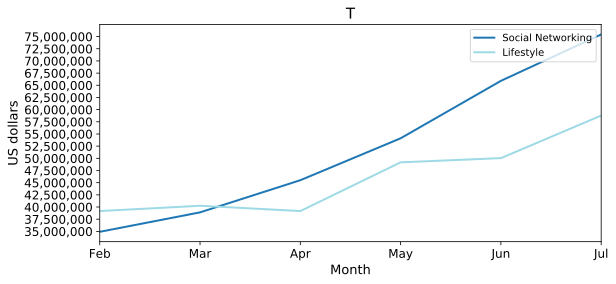

In [22]:
import matplotlib.ticker as ticker

ax = df_socnet_life.T.plot(figsize=(9, 4), lw =2, cmap = 'tab20')


plt.ticklabel_format(style='plain', axis='y')

# добавляем запятые к числам
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# увеличиваем кол-во делений
plt.locator_params(axis='y', nbins=20)

plt.title("T",fontsize=15)

plt.ylabel('US dollars',fontsize=13)
plt.xlabel('Month',fontsize=13)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.legend(loc=1, prop={'size': 10})
#plt.savefig('Category Turnover of the Low Categories.jpg')

plt.show()

# What can we see in raw data

## Despite overlaps btw Social Networking and Lifestyle their patterns are different. Probably they are driven by various factors

## Magazines and Newspapers

In [146]:
df_news_mags = df_rev1.loc[['News',"Magazines and Newspapers"]]
df_news_mags

,Feb,Mar,Apr,May,Jun,Jul
Category,,,,,,
News,"4,433,455.0","4,593,346.0","5,011,191.0","5,372,111.0","5,361,767.0","5,570,677.0"
Magazines and Newspapers,"3,596,499.0","3,814,035.0","4,099,302.0","4,377,514.0","4,381,558.0","4,593,791.0"


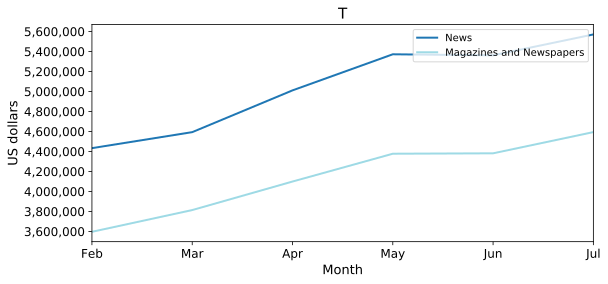

In [147]:
import matplotlib.ticker as ticker

ax = df_news_mags.T.plot(figsize=(9, 4), lw =2, cmap = 'tab20')


plt.ticklabel_format(style='plain', axis='y')

# добавляем запятые к числам
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# увеличиваем кол-во делений
plt.locator_params(axis='y', nbins=20)

plt.title("T",fontsize=15)

plt.ylabel('US dollars',fontsize=13)
plt.xlabel('Month',fontsize=13)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.legend(loc=1, prop={'size': 10})
#plt.savefig('Category Turnover of the Low Categories.jpg')

plt.show()

## Productivity, Utilities and Reference (intersection - translators, VPN apps)

In [148]:
df_prod_util_ref = df_rev1.loc[['Productivity',"Utilities","Reference"]]
df_prod_util_ref

,Feb,Mar,Apr,May,Jun,Jul
Category,,,,,,
Productivity,"16,927,744.0","17,632,362.0","18,502,440.0","19,208,550.0","20,275,979.0","21,597,914.0"
Utilities,"9,261,733.0","10,586,920.0","11,598,584.0","13,060,880.0","12,733,449.0","14,430,620.0"
Reference,"2,578,734.0","2,863,184.0","3,220,607.0","3,932,603.0","4,270,669.0","5,601,551.0"


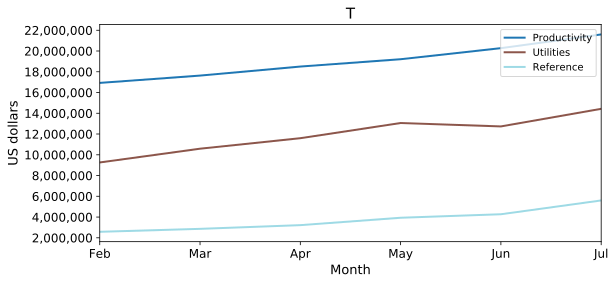

In [149]:
ax = df_prod_util_ref.T.plot(figsize=(9, 4), lw =2, cmap = 'tab20')


plt.ticklabel_format(style='plain', axis='y')

# добавляем запятые к числам
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# увеличиваем кол-во делений
plt.locator_params(axis='y', nbins=20)

plt.title("T",fontsize=15)

plt.ylabel('US dollars',fontsize=13)
plt.xlabel('Month',fontsize=13)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.legend(loc=1, prop={'size': 10})
#plt.savefig('Category Turnover of the Low Categories.jpg')

plt.show()

# General conclusions from all graps 
### Median growth of all categories of mobile applications equals to 38%
### Top categories positively affected by COVID:
### - Education   
### - Lifestyle            
### - Shopping       
### - Navigation         
### - Utilities            
### - Kids                     
### - Photo and Video       
### - Weather                    
### - Books                      
### - Social Networking         
### - Reference
### Categories negatively affected by COVID :
### - Sports
### - Travel
###  Categories indifferent to COVID impact:
### - Music
### - Food and Drink
### - Medical

## График для роста индустрий

In [33]:
df_growth2.set_index('Category', inplace=True)
print(df_rev.T)

Category       Books     Business    Education  Entertainment     Finance  \
Feb      4,846,786.0 10,380,734.0 21,500,869.0   68,955,466.0 3,009,065.0   
Mar      5,844,964.0 11,661,084.0 25,882,147.0   77,828,331.0 3,258,957.0   
Apr      6,994,282.0 12,090,450.0 31,102,429.0   77,926,073.0 3,064,045.0   
May      8,173,745.0 12,720,937.0 31,881,489.0   80,016,713.0 3,308,730.0   
Jun      8,712,324.0 13,419,888.0 30,385,512.0   78,205,463.0 3,270,262.0   
Jul      9,816,153.0 14,400,492.0 31,816,116.0   89,251,811.0 3,570,307.0   

Category  Food and Drink  Health and Fitness         Kids  \
Feb            788,712.0        28,949,778.0  9,907,778.0   
Mar            638,291.0        30,600,290.0 13,204,624.0   
Apr            732,728.0        33,527,780.0 15,598,136.0   
May            763,340.0        37,445,424.0 15,352,072.0   
Jun            740,145.0        36,511,568.0 14,731,429.0   
Jul            777,648.0        39,089,149.0 16,013,065.0   

Category  Magazines and Newspape

In [23]:
# фактически рост Шоппинга в апреде равен 110%
# но я убрал ее, так этот выброс портит весь график
df_growth2.loc['Shopping', 'Apr'] = 40


In [151]:
df_growth2

,Feb,Mar,Apr,May,Jun,Jul
Category,,,,,,
Books,-2.255,15.08,11.275,8.77,-0.45,11.425
Business,-3.26,15.44,7.585,6.76,-5.77,8.15
Education,-0.6,23.435,20.07,1.69,-3.385,4.6
Entertainment,-8.83,14.16,17.91,8.8,-4.51,6.78
Finance,6.045,-1.405,-1.68,22.76,-1.165,-6.62
Food and Drink,-3.08,0.0,7.41,6.06,16.065,-11.92
Health and Fitness,-7.88,10.38,17.355,12.12,-2.78,2.55
Kids,-1.59,33.96,19.35,-2.78,-5.56,4.005
Magazines and Newspapers,3.115,14.245,15.43,4.14,2.58,4.23


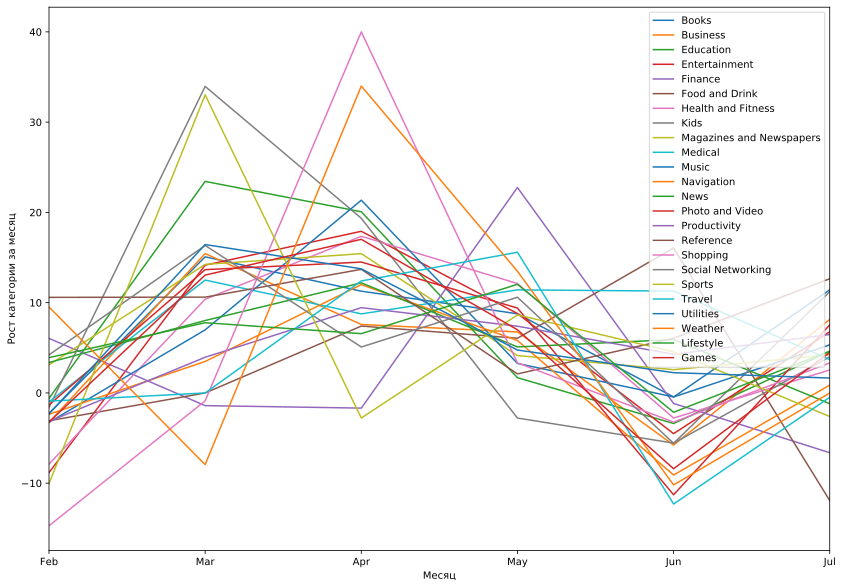

In [36]:
#fig, ax = plt.subplots(figsize=(10, 6))
#plt.plot(new_df.T)

df_growth2.T.plot(figsize=(14, 10))

plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Рост категории за месяц')

plt.xlabel('Месяц')
plt.legend();
plt.show()

# Выбираю только важные категории

In [ ]:
# Top outperfoming categories (> median)
# Education                   47.976
#Lifestyle                   50.063
#Shopping                    50.574
#Navigation                   55.57
#Utilities                   55.809
#Kids                        61.621
#Photo and Video             63.288
#Weather                     70.686
#Books                      102.529 (out of scope)
#Social Networking          116.096
#Reference                  117.221

In [25]:
df_f_sorted1 = df_growth2.loc[["Kids","Social Networking", "Photo and Video","Sports","Entertainment","Reference"]]

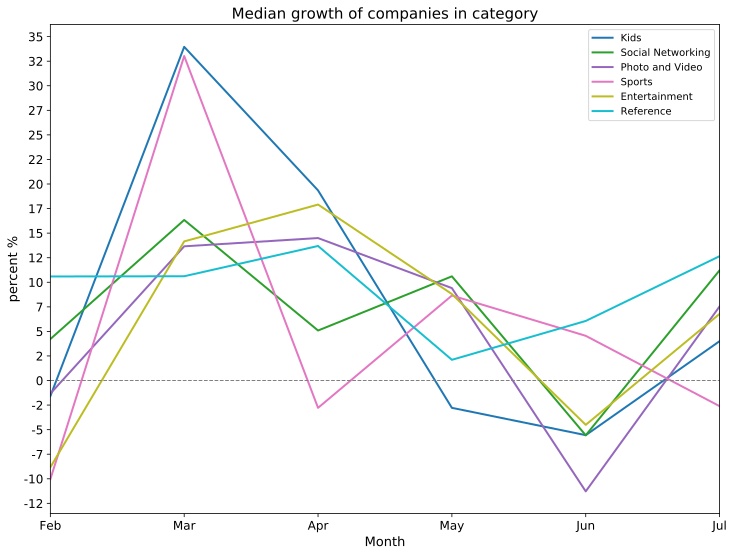

In [26]:
import matplotlib.ticker as ticker

ax = df_f_sorted1.T.plot(figsize=(12, 9), lw =2, cmap = 'tab10')


plt.ticklabel_format(style='plain', axis='y')

# добавляем запятые к числам
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# увеличиваем кол-во делений
plt.locator_params(axis='y', nbins=20)

plt.title("Median growth of companies in category",fontsize=15)

plt.ylabel('percent %',fontsize=13)
plt.xlabel('Month',fontsize=13)
plt.axhline(0, color='grey', linestyle='dashed', linewidth=1)


plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.legend(loc=1, prop={'size': 10})
plt.savefig('Median growth of companies in selected categories.jpg')
plt.show()

## Reference has shown the highest increase of turnover and its companies median growth were positive throughout the whole period in contrast to other categories

In [864]:
plt.savefig('Median growth of companies in selected categories.jpg')

<Figure size 720x720 with 0 Axes>

## Growth of applications in Books, Productivity, Business categories

In [27]:
df_gr_book_bus_prod = df_growth2.loc[["Books","Business", "Productivity"]]

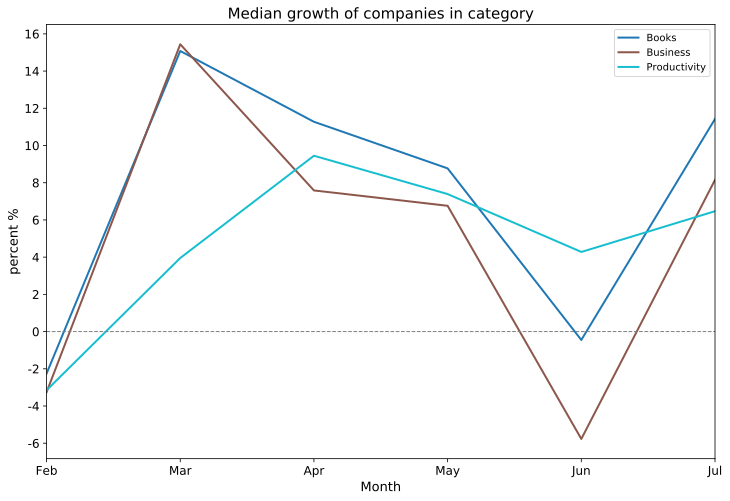

In [28]:
import matplotlib.ticker as ticker

ax = df_gr_book_bus_prod.T.plot(figsize=(12, 8), lw =2, cmap = 'tab10')


plt.ticklabel_format(style='plain', axis='y')

# добавляем запятые к числам
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# увеличиваем кол-во делений
plt.locator_params(axis='y', nbins=20)

plt.title("Median growth of companies in category",fontsize=15)

plt.ylabel('percent %',fontsize=13)
plt.xlabel('Month',fontsize=13)
plt.axhline(0, color='grey', linestyle='dashed', linewidth=1)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.legend(loc=1, prop={'size': 10})
#plt.savefig('Median growth of companies in selected categories.jpg')
plt.show()

## Запишу голосовое на этот счет

## Growth of apps in the COVID-neutral categories

In [29]:
df_gr_book_bus_prod = df_growth2.loc[["Music","Food and Drink", "Medical"]]

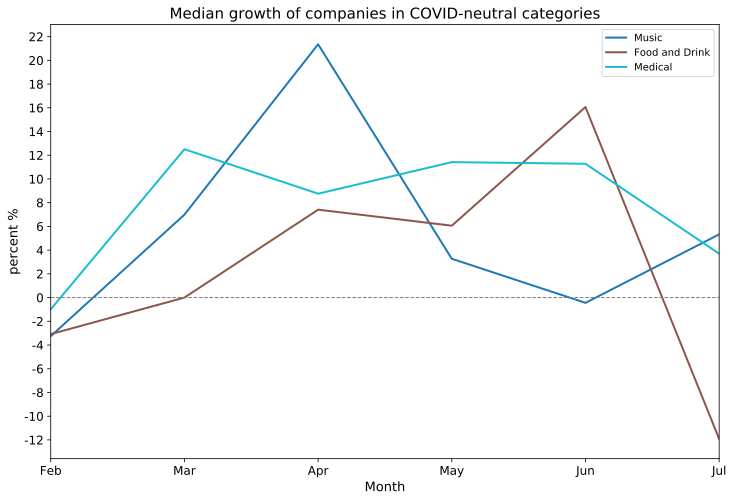

In [30]:
import matplotlib.ticker as ticker

ax = df_gr_book_bus_prod.T.plot(figsize=(12, 8), lw =2, cmap = 'tab10')


plt.ticklabel_format(style='plain', axis='y')

# добавляем запятые к числам
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# увеличиваем кол-во делений
plt.locator_params(axis='y', nbins=20)

plt.title("Median growth of companies in COVID-neutral categories",fontsize=15)

plt.ylabel('percent %',fontsize=13)
plt.xlabel('Month',fontsize=13)
plt.axhline(0, color='grey', linestyle='dashed', linewidth=1)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.legend(loc=1, prop={'size': 10})
#plt.savefig('Median growth of companies in selected categories.jpg')
plt.show()

# Разделяю  на два дф 

In [780]:
df_growth_sorted1 = df_growth2[df_growth2["Mar"] <= 10]
df_growth_sorted1

,Feb,Mar,Apr,May,Jun,Jul
Category,,,,,,
Finance,6.045,-1.405,-1.68,22.76,-1.165,-6.62
Food and Drink,-3.08,0.0,7.41,6.06,16.065,-11.92
Music,-3.255,6.99,21.355,3.27,-0.445,5.33
Navigation,-2.36,3.49,12.0,5.81,-9.09,0.87
News,3.375,8.025,12.2,5.1,5.915,-1.19
Productivity,-3.15,3.955,9.45,7.39,4.28,6.47
Shopping,-14.715,-0.875,40.0,3.33,-3.23,3.33
Travel,-0.905,0.0,12.41,15.59,-12.305,-0.48
Weather,9.52,-7.94,34.0,13.48,-10.19,0.0


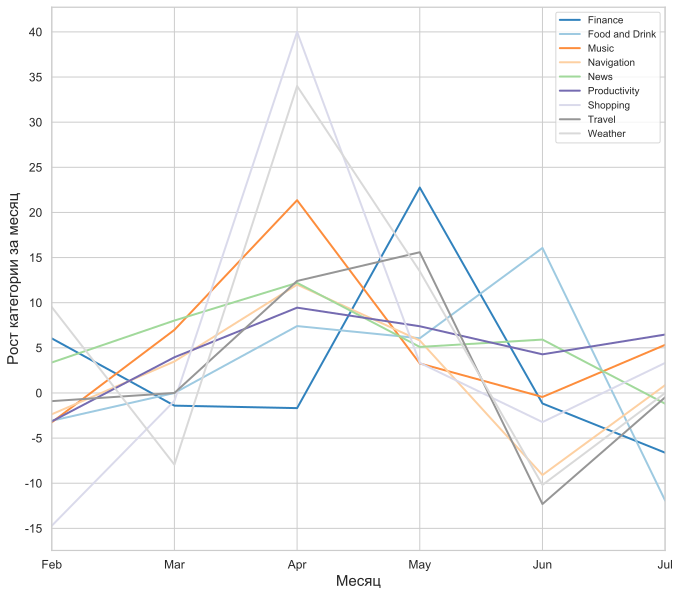

In [789]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = df_growth_sorted1.T.plot(figsize=(11, 10), lw =2, cmap = 'tab20c')


plt.ticklabel_format(style='plain', axis='y')

# добавляем запятые к числам
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# увеличиваем кол-во делений
plt.locator_params(axis='y', nbins=20)

plt.title("Median growth of companies in category",fontsize=15)

plt.ylabel('percent %',fontsize=13)
plt.xlabel('Month',fontsize=13)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.legend(loc=1, prop={'size': 10})
plt.show()

In [783]:
df_growth_sorted2 = df_growth2[df_growth2["Mar"] > 10]
df_growth_sorted2

,Feb,Mar,Apr,May,Jun,Jul
Category,,,,,,
Books,-2.255,15.08,11.275,8.77,-0.45,11.425
Business,-3.26,15.44,7.585,6.76,-5.77,8.15
Education,-0.6,23.435,20.07,1.69,-3.385,4.6
Entertainment,-8.83,14.16,17.91,8.8,-4.51,6.78
Health and Fitness,-7.88,10.38,17.355,12.12,-2.78,2.55
Kids,-1.59,33.96,19.35,-2.78,-5.56,4.005
Magazines and Newspapers,3.115,14.245,15.43,4.14,2.58,4.23
Medical,-0.99,12.505,8.76,11.42,11.28,3.7
Photo and Video,-1.33,13.66,14.5,9.405,-11.28,7.54


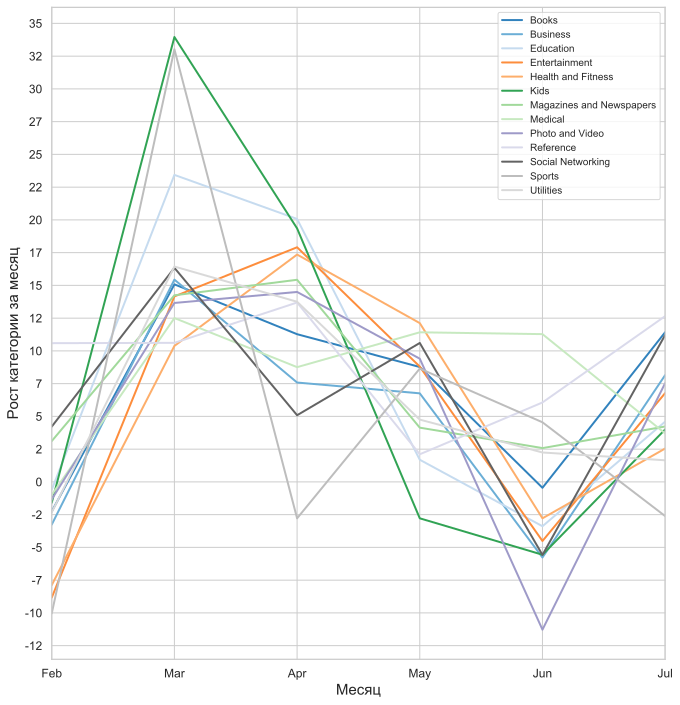

In [956]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = df_growth_sorted2.T.plot(figsize=(11, 12), lw =2, cmap = 'tab20c')

#fig = px.line(df_growth_sorted2.T)

plt.ticklabel_format(style='plain', axis='y')

# добавляем запятые к числам
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# увеличиваем кол-во делений
plt.locator_params(axis='y', nbins=20)

plt.title("Median growth of companies in category",fontsize=15)

plt.ylabel('percent %',fontsize=13)
plt.xlabel('Month',fontsize=13)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.legend(loc=1, prop={'size': 10})
plt.show()

# Part 2
## Функция для выделения корпораций цветом

In [329]:
# удаляем корпорации, в приложения которые точно нельзя инвестировать
holdings = ["Netflix", "AT&T", "Rakuten", "Sony", "Amazon", "Disney", "Discovery, Inc.", "Tencent", "Disney", "Warner Media",
           "Viacom","ByteDance", "Coursera", "Course Hero","Microsoft","Google", "NY Times", "Bloomberg", "The Guardian", 
           "The Economist", "Mozilla", "GoPro", "Adobe", "Apple", "NBA", "MLB Advanced Media", "IBM", "Spin Master", "Baidu",
           "InterActiveCorp (IAC)", "Kakao Corp","Intuit","Verizon","Under Armour","Hasbro", "NY Times", "SoundCloud",
            "Spotify", "Nash Holdings", "JOYY Inc.", "The Meet Group", "Facebook", "Liberty Media", "News Corp"]
#indexes = df_pivot[df_pivot["Parent"].isin(holdings)].index

def highlight_corps(x):
    if x.Parent in holdings:
        return ['background-color: yellow']*len(x.values)
    else:
        return ['background-color: transparent']*len(x.values)

#df_pivott = df_pivot.style.apply(highlight_corps, axis=1)
#df_pivott

## Фильтрация

In [330]:
# квантили
print(df_pivot["Change (%)"].quantile([.1, .2, .3, .4, .5, .6, .7, .8,.9]))
quant_70 = df_pivot["Change (%)"].quantile(.7)
quant_80 = df_pivot["Change (%)"].quantile(.8)
quant_90 = df_pivot["Change (%)"].quantile(.9)
print(df_pivot["Revenue"].quantile([.1, .2, .3, .4, .5, .6, .7, .8,.9]))
#исходя из этого стоит и выставлять значения для фильтра

0.1               -26.352
0.2   -15.349999999999998
0.3    -7.978000000000003
0.4    -4.353999999999999
0.5                 -2.47
0.6                   0.0
0.7    3.3859999999999992
0.8    10.040000000000006
0.9     29.72400000000004
Name: Change (%), dtype: float64
0.1                 64.0
0.2                 75.0
0.3                 85.0
0.4                104.0
0.5                137.0
0.6                183.0
0.7                251.0
0.8   369.20000000000005
0.9    837.2000000000003
Name: Revenue, dtype: float64


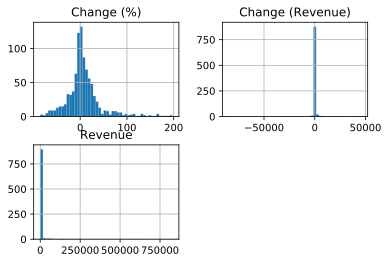

In [242]:
df_pivot[df_pivot["Change (%)"] < 200].hist(bins=50)
plt.show()

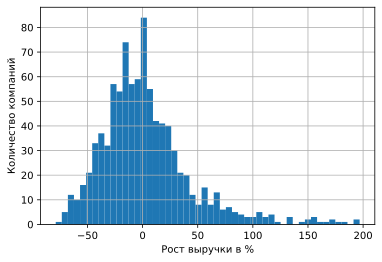

In [18]:
dfff = df_pivot[(df_pivot["Change (%)"] < 200)].copy()
ax = dfff["Change (%)"].hist(bins=50)
ax.set_ylabel("Количество компаний")
ax.set_xlabel("Рост выручки в %")
plt.show()

In [331]:
df_pivot.head(60)

,App Name,Category,Parent,Revenue,Change (%),Change (Revenue)
0,NOAA Radar by Apalon,Weather,InterActiveCorp (IAC),"1,586,308.0",16.58,"225,648.0"
1,ForeFlight Mobile,Weather,Boeing,"588,508.0",-0.95,"-5,630.0"
2,The Weather Channel,Weather,IBM,"540,832.0",-1.26,"-6,924.0"
3,MyRadar Weather Radar,Weather,ACME AtronOmatic,"200,470.0",71.28,"83,431.0"
4,Surfline,Weather,Surfline Wavetrak,"172,493.0",2.74,"4,600.0"
5,Weather Live,Weather,InterActiveCorp (IAC),"172,055.0",7.04,"11,317.0"
6,The Weather Forecast App,Weather,Position Mobile Ltd SEZC,"122,319.0",7.65,"8,696.0"
7,Dark Sky,Weather,Apple,"100,782.0",2.98,"2,918.0"
8,Weather ·,Weather,Luni,"74,910.0",1.17,869.0
9,RadarScope,Weather,Base Velocity,"70,925.0",-17.87,"-15,430.0"


# Делаем сводники

In [332]:
# сортировка по выручке ( вручную ) и темпам роста выручки ( по квантилям ) 
first_limit = 1700
second_limit = 6000
third_limit = 40000
df_pivot = df_pivot[((df_pivot['Revenue']>= first_limit) & (df_pivot['Revenue']< second_limit)) & (df_pivot['Change (%)']>=quant_80)| 
                     (df_pivot['Revenue']>= second_limit) & (df_pivot['Revenue'] < third_limit) & (df_pivot['Change (%)']>=quant_70)|
                     (df_pivot['Revenue']>= third_limit)                                                                     | 
                     (df_pivot['Revenue']>= 1500) & (df_pivot['Change (%)']>=quant_90)].copy()
print(df_pivot.shape)
df_pivot.sort_values('Revenue', ascending=False).tail(60)

(28, 6)


,App Name,Category,Parent,Revenue,Change (%),Change (Revenue)
0,NOAA Radar by Apalon,Weather,InterActiveCorp (IAC),"1,586,308.0",16.58,"225,648.0"
1,ForeFlight Mobile,Weather,Boeing,"588,508.0",-0.95,"-5,630.0"
2,The Weather Channel,Weather,IBM,"540,832.0",-1.26,"-6,924.0"
3,MyRadar Weather Radar,Weather,ACME AtronOmatic,"200,470.0",71.28,"83,431.0"
4,Surfline,Weather,Surfline Wavetrak,"172,493.0",2.74,"4,600.0"
5,Weather Live,Weather,InterActiveCorp (IAC),"172,055.0",7.04,"11,317.0"
6,The Weather Forecast App,Weather,Position Mobile Ltd SEZC,"122,319.0",7.65,"8,696.0"
7,Dark Sky,Weather,Apple,"100,782.0",2.98,"2,918.0"
8,Weather ·,Weather,Luni,"74,910.0",1.17,869.0
9,RadarScope,Weather,Base Velocity,"70,925.0",-17.87,"-15,430.0"


# Сохранение

### отмечаем цветом корпорации и холдинги

In [333]:
df_pivot = df_pivot.style.apply(highlight_corps, axis=1)

In [334]:
df_pivot

,App Name,Category,Parent,Revenue,Change (%),Change (Revenue)
0,NOAA Radar by Apalon,Weather,InterActiveCorp (IAC),1.58631e+06,16.58,225648
1,ForeFlight Mobile,Weather,Boeing,588508,-0.95,-5630
2,The Weather Channel,Weather,IBM,540832,-1.26,-6924
3,MyRadar Weather Radar,Weather,ACME AtronOmatic,200470,71.28,83431
4,Surfline,Weather,Surfline Wavetrak,172493,2.74,4600
5,Weather Live,Weather,InterActiveCorp (IAC),172055,7.04,11317
6,The Weather Forecast App,Weather,Position Mobile Ltd SEZC,122319,7.65,8696
7,Dark Sky,Weather,Apple,100782,2.98,2918
8,Weather ·,Weather,Luni,74910,1.17,869
9,RadarScope,Weather,Base Velocity,70925,-17.87,-15430


## Сохранение листа категории в сводную таблицу за месяц

In [335]:
#сохранение как новый лист в готовом экселе
with pd.ExcelWriter('C:\\Users\\svzab\\OneDrive\\Desktop\\Сводники и дф для графиков\\Pivot_Aug.xlsx',engine='openpyxl',
                    mode='a') as writer:  
    df_pivot.to_excel(writer, sheet_name='{}'.format(category))

In [91]:
df_pivot[(df_pivot['Revenue']>= 8000) & (df_pivot['Change (%)']>200)]

,App Name,Category,Parent Company Name,Revenue,Change (%),Change (Revenue)
7,Toca Hair Salon 4,Kids,Spin Master,304772.0,244.41,216280.0
19,Kindergarten Educational Games,Kids,Genesis Media,104463.0,219.11,71727.0
20,Toca Hair Salon 3,Kids,Spin Master,97328.0,219.03,66821.0
36,Keiki ABC Kids Learning Games,Kids,Genesis Media,42652.0,796.62,37895.0
95,Toca Hair Salon 2,Kids,Spin Master,16876.0,575.58,14378.0


In [ ]:
# что сделать:
# проверить Change (Revenue) - Все ОК, тут отражается изменение за месяц, все правильно
# попробовать соединить IOS и андроид( сложно)
# Изменить дату  и апдейт
# найти баланс между тоталом по выручке и росту в процентах


In [71]:
df_app.Revenue[100:150]

,Rank,Category,Platform,Period,App ID,App Name,Revenue,Change (%),Change (Rank),Change (Revenue),Unit,AppURL,Star Rating,Ratings,App Release Date,Last Update,Parent Company Name,HQ Country
0,1,Entertainment,iOS,2020-05-01~2020-05-31,1.000600e+15,Disney+,17594015.0,-0.43,0.0,-76712.0,USD,http://www.appannie.com/apps/all-stores/app/10...,4.5,133060,2019-03-25,2020-07-27,Disney,United States
1,2,Entertainment,iOS,2020-05-01~2020-05-31,1.000600e+15,Netflix,12377472.0,-4.48,0.0,-580533.0,USD,http://www.appannie.com/apps/all-stores/app/10...,3.6,540140,2010-04-01,2020-07-28,Netflix,United States
2,3,Entertainment,iOS,2020-05-01~2020-05-31,1.000600e+15,Hulu,7822204.0,11.37,0.0,798393.0,USD,http://www.appannie.com/apps/all-stores/app/10...,4.6,1235541,2010-06-29,2020-07-29,Disney,United States
3,4,Entertainment,iOS,2020-05-01~2020-05-31,1.000600e+15,HBO Max,3980161.0,-0.42,1.0,-16942.0,USD,http://www.appannie.com/apps/all-stores/app/10...,3.1,6399,2015-04-07,2020-07-27,Warner Media,United States
4,5,Entertainment,iOS,2020-05-01~2020-05-31,1.000600e+15,TikTok,3920302.0,-8.54,-1.0,-366284.0,USD,http://www.appannie.com/apps/all-stores/app/10...,4.7,6059688,2014-04-02,2020-07-30,ByteDance,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Entertainment,iOS,2020-05-01~2020-05-31,1.434195e+09,Daily Decision Wheel,295.0,4.24,NaN,12.0,USD,http://www.appannie.com/apps/ios/app/1434195334/,4.6,2745,2018-09-26,2020-07-31,Vladimir Roganov,NaN
996,997,Entertainment,iOS,2020-05-01~2020-05-31,1.225190e+09,Truth Or Dare : Party Game,293.0,876.67,NaN,263.0,USD,http://www.appannie.com/apps/ios/app/1225189596/,4.7,17727,2017-05-01,2020-07-31,DH3 Games,NaN
997,998,Entertainment,iOS,2020-05-01~2020-05-31,1.455068e+09,VIBE Aesthetic Wallpaper 4K,292.0,-18.21,-64.0,-65.0,USD,http://www.appannie.com/apps/ios/app/1455068369/,4.6,739,2019-03-22,2020-07-31,Apalto,Russia
998,999,Entertainment,iOS,2020-05-01~2020-05-31,1.000600e+15,XLR8,291.0,17.34,NaN,43.0,USD,http://www.appannie.com/apps/all-stores/app/10...,2.6,253,2012-04-06,2017-09-23,2XL Games,United States


# Добавление Google Play ( доработать)

In [96]:
# Google Play
df2 = pd.read_excel("C:\\Users\\svzab\\OneDrive\\Desktop\\App_Annie_Ent_May_GP.xlsx")
# оставляем только топ по выручке
df_app_2 = df2[df2['Unit'] == 'USD'].copy()
df_app_2 = df_app_2.reset_index(drop=True)
df_app_2.rename(columns = {'Value':'Revenue','Change (Value)':'Change (Revenue)','Store':'Platform'}, inplace = True)
df_app_2

,Rank,Category,Platform,Device,Type,Country,Period,Version,App ID,App Name,...,Last Update,Publisher ID,Publisher Name,Company Name,Parent Company Name,App Franchise,App Franchise ID,Company ID,Parent Company ID,HQ Country
0,1,Entertainment,Google Play,All,Grossing,United States,2020-05-01~2020-05-31,Web,1.000600e+15,Disney+,...,2020-07-21,NaN,NaN,Disney,Disney,NaN,NaN,1.000200e+15,1.000200e+15,United States
1,2,Entertainment,Google Play,All,Grossing,United States,2020-05-01~2020-05-31,Web,1.000600e+15,Twitch,...,2020-07-23,NaN,NaN,Twitch Interactive,Amazon,NaN,NaN,1.000200e+15,1.000200e+15,United States
2,3,Entertainment,Google Play,All,Grossing,United States,2020-05-01~2020-05-31,Web,1.000600e+15,HBO Max,...,2020-07-23,NaN,NaN,Warner Media,Warner Media,NaN,NaN,1.000200e+15,1.000200e+15,United States
3,4,Entertainment,Google Play,All,Grossing,United States,2020-05-01~2020-05-31,Web,1.000600e+15,STARZ,...,2020-07-29,NaN,NaN,Starz Entertainment,Starz Entertainment,NaN,NaN,1.000200e+15,1.000200e+15,United States
4,5,Entertainment,Google Play,All,Grossing,United States,2020-05-01~2020-05-31,Web,1.000600e+15,CBS,...,2020-07-27,NaN,NaN,CBS Interactive,CBS Corporation,NaN,NaN,1.000200e+15,1.000200e+15,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,744,Entertainment,Google Play,Google Play,Grossing,United States,2020-05-01~2020-05-31,Web,2.060001e+13,CHOEAEDOL Celeb – Korean Star Ranks,...,2020-07-25,2.020000e+13,ExodusEnt.,Exodus,Exodus,CHOEAEDOL Celeb – Korean Star Ranks,NaN,1.000200e+15,1.000200e+15,South Korea
744,745,Entertainment,Google Play,Google Play,Grossing,United States,2020-05-01~2020-05-31,Web,2.060001e+13,Mahar,...,2020-04-15,2.020000e+13,ABC Content Solutions,ABC Content Solutions,ABC Content Solutions,Mahar,NaN,NaN,NaN,NaN
745,746,Entertainment,Google Play,Google Play,Grossing,United States,2020-05-01~2020-05-31,Web,2.060000e+13,CritDice - Dice Roller,...,2020-04-20,2.020000e+13,VueSoft LLC,VueSoft LLC,VueSoft LLC,CritDice - Dice Roller,NaN,NaN,NaN,NaN
746,747,Entertainment,Google Play,Google Play,Grossing,United States,2020-05-01~2020-05-31,Web,2.060000e+13,Ultimate EMF Detector Pro,...,2020-04-15,2.020000e+13,MRE Programming,MRE Programming,MRE Programming,Ultimate EMF Detector Pro,NaN,NaN,NaN,NaN


In [89]:
df_app_2.describe()

,App ID,Revenue,Change (%),Change (Rank),Change (Revenue)
count,1.000000e+03,1.000000e+03,970.000000,877.000000,1000.000000
mean,3.672210e+14,8.002094e+04,149.156227,2.132269,4503.103000
std,4.825164e+14,7.569058e+05,1193.075241,111.413729,43725.181596
min,3.008977e+08,2.910000e+02,-93.850000,-533.000000,-580533.000000
25%,1.284188e+09,6.655000e+02,-9.765000,-35.000000,-154.500000
50%,1.476204e+09,1.880000e+03,8.665000,-4.000000,155.500000
75%,1.000600e+15,8.411500e+03,37.187500,30.000000,922.000000
max,1.000600e+15,1.759402e+07,27036.170000,741.000000,798393.000000


In [97]:
del df_app_2['Parent Company Name']
del df_app_2['Type']
del df_app_2['Company ID']
del df_app_2['Version']
del df_app_2['Country']
del df_app_2['Device']
del df_app_2['Publisher ID']
del df_app_2['Company Name']
del df_app_2['App Franchise']
del df_app_2['Value Type']
del df_app_2['App IAP']
del df_app_2['App Franchise ID']
del df_app_2['Publisher Name']
del df_app_2['App Category']
del df_app_2['Is Unified']

In [106]:
df_app_2.loc["App Name"] ="Twitch"

In [120]:
# как соединить айос и гп
# Идея: создать новый столбец для выручки и др
# запустить цикл, чтобы в гп искал названия приложений
# если название в гп совпадает с названием в айос, то в таблицу айос в новый столбец кладем новые данные
# потом делаем тотал по выручке
# если не находит, то оставляем ноль
# проблема в том, как этот цикл запустить и сделать так, чтобы он итерировал названия
#
#
#